## **CIFAR 10 image classification project**

The CIFAR-10 dataset consists of 60,000 32x32 colour images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images

It divided into 5 training batches and 1 test batch and each batch with 10,000 images.The test batch exactly contain 1000 randomly selected images from each class. The training batches may contains more images from one class than other, contains 5000 images from each class.



# The CIFAR - 10 dataset

**SSL**- Self supervised learning

SSL pretext task is to learn a good representation of the input so that it can subsequently be used for supervised tasks.In SSL, the model is trained to predict one part of the data given other parts of the data

In [1]:
import pandas as pd   #used for data analysis and associated manipulation of tabular data in DataFrames.
import numpy as np # advanced math library for linear algebra
import matplotlib.pyplot as plt  # MATLAB like plotting, routines for data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf  #TensorFlow is a Python-friendly open source library for numerical computation that makes machine learning and developing neural networks faster and easie 
import ssl                                                          
ssl._create_default_https_context = ssl._create_unverified_context

## Data

CIFAR - 10

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test,  y_test) = cifar10.load_data() #loading the dataset

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train.shape #shape of X_train
# here 50,000 is the training data, image 32X32 and colour channels 3

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape #shape of the first data

(32, 32, 3)

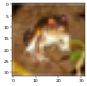

In [ ]:
# Frog
plt.figure(figsize=(4,3), dpi=32) # dpi is the resolution in dots per inch
plt.imshow(x_train[0]) #showing the first image

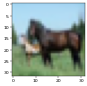

In [ ]:
# Horse
plt.figure(figsize=(4,3), dpi=32) 
plt.imshow(x_train[12]) 

#**Preprocessing**

In [ ]:
x_train[0] #showing all the pixel values here(3-d data)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
x_train[0].shape #shape of the pixel values

(32, 32, 3)

In [ ]:
x_train.max() #the maximum pixel value

255

In [ ]:
x_train = x_train/255  #1byte = 8 bits. (Image is a 2D array) 2^8 =256, so 256 different values can be fit into 1 (0-255)

In [ ]:
x_test = x_test/255    # normalize each value for each pixel 

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

#**Labels**

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
y_cat_train = to_categorical(y_train,10) #change the training data into the categorical one

In [ ]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test,10) #change the test data into the categorical one

##**Building the model**

# **Model Type: Sequential**

There are three ways to create Keras models:
Sequential Model, Functional API, Model Subclassing 

The **Sequential Model** in Keras allows us to create models layer-by-layer for most problems. It is limited to single-input, single-output stacks of layers.

The Sequential model API is a way of creating deep learning models where an instance of the Sequential class is created and model layers are created and added to it.

* **Conv2D**- Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

* **Max pooling**- It downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window for each channel of the input.

* **ZeroPadding2D**- when moving the feature detector across the input image all the pixels except the edge pixels are taken for calculation repeatedly. So there is unfairness and to address this there is a process called Padding (adding a frame). This layer can add rows and columns of zeros at the top, bottom, left and right side of an image tensor.
* **GlobalAveragePooling2D**- globalAveragePooling2d() function is used for applying global average pooling operation for spatial data.
* **Flatten** - Flatten layer is used to make the multidimensional input one-dimensional, commonly used in the transition from the convolution layer to the full connected layer.

### **RELU Activation Function**
* Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. 
* The purpose of the activation function is to introduce non-linearity into the output of a neuron.
* **Rectifier function (RELU)** – max(X,0) – take the maximum, anything positive keep that as it is but anything negative make it 0.
* It is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. 
* RELU is such an actiavtion function that preserves the property of  linear function, but is, in fact, a nonlinear function allowing complex relationships in the data to be learned.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten

In [ ]:
model =  Sequential()

# **First set of layers**

## **Convolution Layer**
* The convolutional layer is considered an essential block of the CNN.
* A convolutional layer contains a set of filters whose parameters need to be learned. The height and weight of the filters are smaller than those of the input volume.
* Input shape is  28x28x1 as we are taking input 3D data.

**Filters**-a convolutional matrix (also called filter or kernel) is “slid” across the image and applied at each position

**Kernal size**-the kernel size here refers to the widthxheight of the filter mask

**input_shape**- the shape of the input data provided to the Keras model while training

In [ ]:
# Convolution layer
model.add(Conv2D(filters = 32,  kernel_size = (4,4),
                 input_shape = (32,32,3), activation = 'relu'))



In [ ]:
# Pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#**Second set of layers**

In [ ]:
# Convolution layer
model.add(Conv2D(filters = 31,  kernel_size = (6,6),
                 input_shape = (32,32,3), activation = 'relu'))

# Pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
# Flatten images from 28 by 28 to 764 before final layer
model.add(Flatten())

In [ ]:
#Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer
#The Dropout layer is a mask that nullifies the contribution of some neurons towards the next layer and leaves unmodified all others
from keras.layers.core import Dense, Dropout, Activation 
model.add(Dense(256,  activation = 'relu'))

In [ ]:
# Softmax activation function basically used in the multidimensional case, goal is to transform the scores of an abundant set to a vector of probablity
model.add(Dense(10, activation = 'softmax'))

#**Compiling**

compile the model with loss and optimizer functions


1. loss f: how far off predictions are from desired output, basically calculates the gap between actual output and desired output


2. optimizer: adjusting internal values to reduce loss, basically it      directs how weights should be adjusted

In [ ]:
# Compiling
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
# to get the trainable and non trainable data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 31)          35743     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 31)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 496)               0         
                                                                 
 dense (Dense)               (None, 256)               1

In [ ]:
# importing earlystopping to prevent overfitting and callback the model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss',  patience = 3)

In [ ]:
# fitting the model
model.fit(x_train,  y_cat_train, epochs=5,
          validation_data = (x_test,  y_cat_test),
          callbacks = [early_stop])

Epoch 1/5
1563/1563 [==============================] - 21s 8ms/step - loss: 1.5768 - accuracy: 0.4304 - val_loss: 1.3905 - val_accuracy: 0.5154
Epoch 2/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2137 - accuracy: 0.5726 - val_loss: 1.1949 - val_accuracy: 0.5703
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0663 - accuracy: 0.6291 - val_loss: 1.1312 - val_accuracy: 0.6161
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9639 - accuracy: 0.6656 - val_loss: 1.0083 - val_accuracy: 0.6570
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8920 - accuracy: 0.6902 - val_loss: 1.1648 - val_accuracy: 0.6269


In [ ]:
model.save('cifar_5epochs.h5')

In [ ]:
# converting the losses into dataframe
losses = pd.DataFrame(model.history.history)

In [ ]:
# Checking the dataframes

In [ ]:
losses.head()      

,loss,accuracy,val_loss,val_accuracy
0,1.576813,0.43038,1.390451,0.5154
1,1.213651,0.57258,1.194943,0.5703
2,1.066262,0.62914,1.131213,0.6161
3,0.963949,0.66558,1.008290,0.6570
4,0.891997,0.69024,1.164751,0.6269


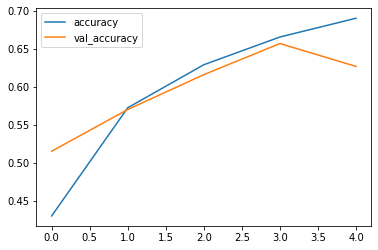

In [ ]:
losses[['accuracy', 'val_accuracy']].plot()

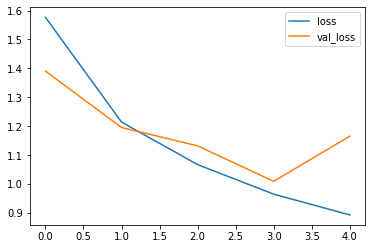

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
print(model.metrics_names)
print(model.evaluate(x_test,  y_cat_test, verbose = 0))

['loss', 'accuracy']
[1.1647512912750244, 0.6269000172615051]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
predict_x = model.predict(x_test)
predict_classes = np.argmax(predict_x,axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# A Classification report is used to measure the quality of predictions from a classification algorithm.
print(classification_report(y_test,predict_classes))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68      1000
           1       0.89      0.61      0.72      1000
           2       0.53      0.54      0.54      1000
           3       0.44      0.56      0.49      1000
           4       0.42      0.86      0.56      1000
           5       0.65      0.46      0.54      1000
           6       0.77      0.60      0.67      1000
           7       0.72      0.68      0.70      1000
           8       0.83      0.68      0.75      1000
           9       0.79      0.64      0.70      1000

    accuracy                           0.63     10000
   macro avg       0.67      0.63      0.64     10000
weighted avg       0.67      0.63      0.64     10000



In [ ]:
confusion_matrix(y_test,predict_classes)    

array([[650,   9, 114,  31,  76,  11,  13,  27,  53,  16],
       [ 47, 612,  22,  34,  70,  10,  34,  25,  27, 119],
       [ 29,   1, 544,  99, 207,  51,  39,  22,   5,   3],
       [ 10,   2,  70, 560, 206,  96,  25,  22,   7,   2],
       [ 10,   0,  41,  35, 858,  12,   4,  32,   6,   2],
       [  7,   0,  66, 242, 138, 457,  21,  65,   3,   1],
       [  4,   1,  53, 108, 215,  14, 597,   8,   0,   0],
       [  6,   0,  35,  64, 180,  32,   4, 675,   1,   3],
       [103,  22,  46,  42,  37,  11,  19,  15, 681,  24],
       [ 46,  43,  32,  57,  71,  14,  16,  50,  36, 635]])

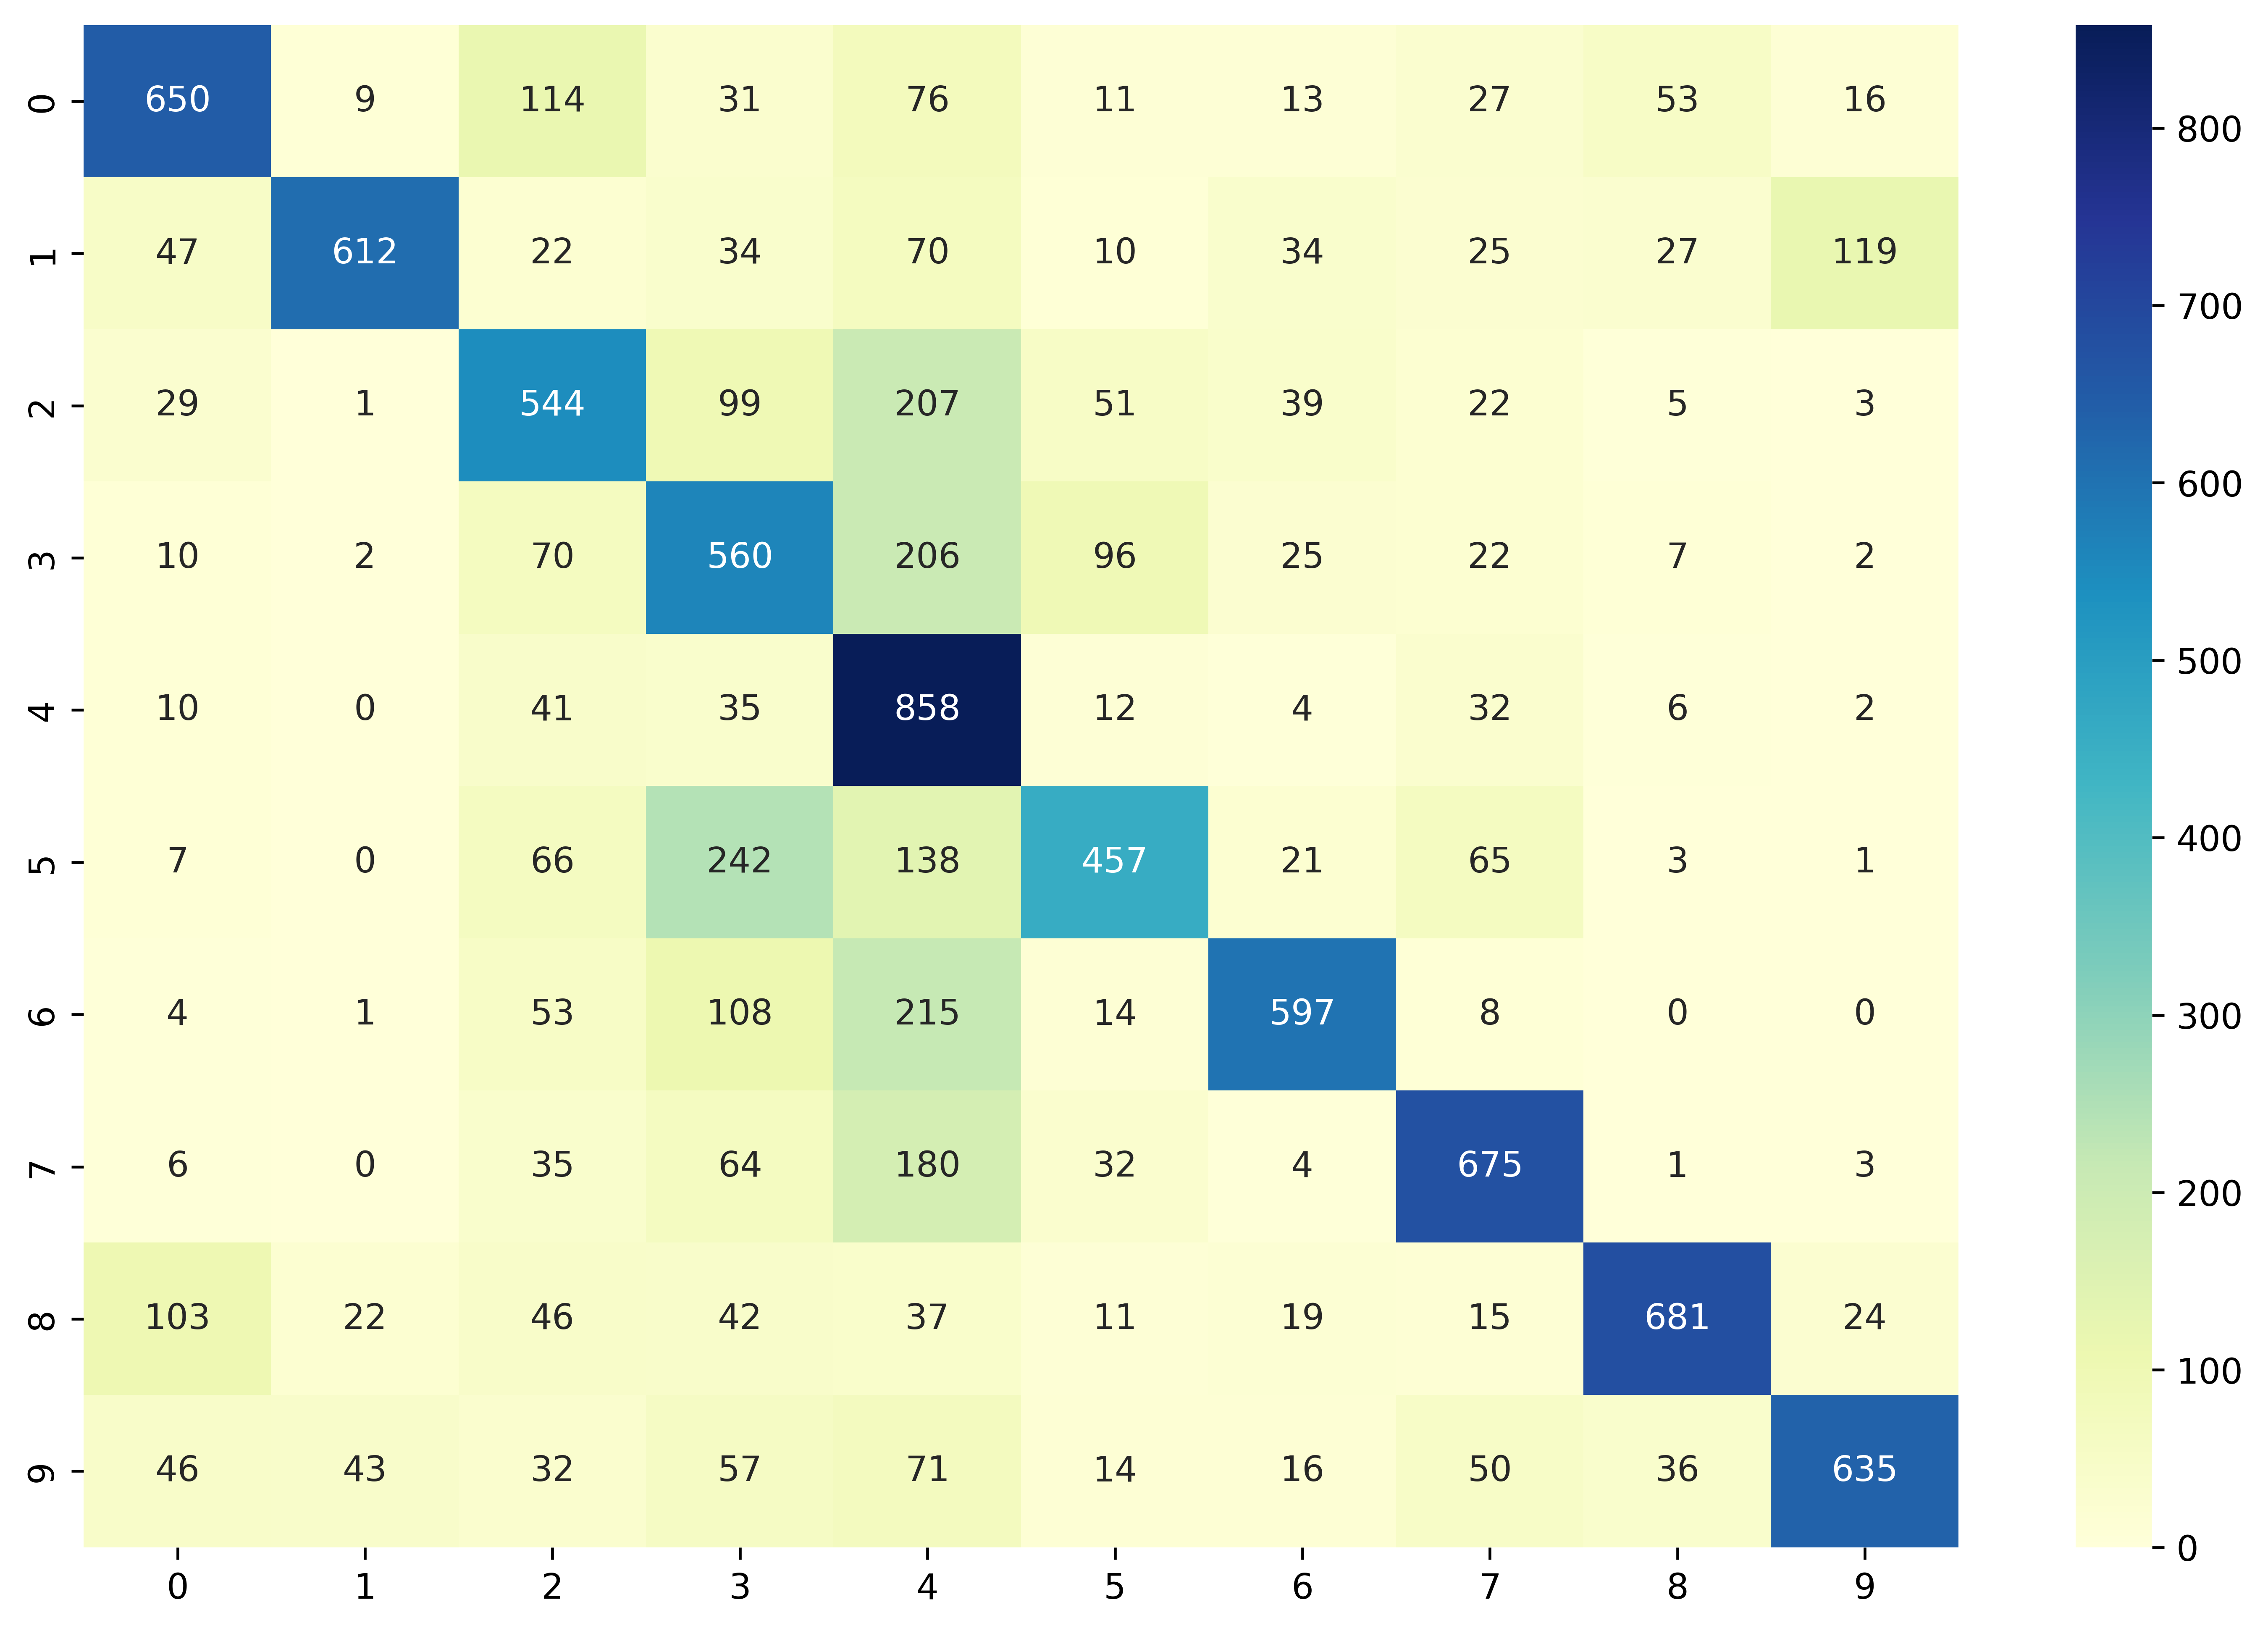

In [ ]:
# visualising the confusion_matrix
import seaborn as sns
plt.figure(figsize=(12,8), dpi = 600)
sns.heatmap(confusion_matrix(y_test,predict_classes),cmap="YlGnBu", annot=True, fmt='g');

In [ ]:
my_image = x_test[10]

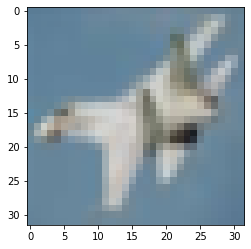

In [ ]:
plt.imshow(my_image);

In [ ]:
np.set_printoptions(formatter = {'float_kind': '{:f}'.format})

model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 49ms/step


array([[0.097777, 0.000142, 0.143795, 0.026569, 0.639683, 0.042329,
        0.009430, 0.011690, 0.028372, 0.000213]], dtype=float32)